In [756]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import VAR
from scipy.stats import pearsonr
pd.set_option('display.max_columns',None)

# data

In [757]:
data_owid = pd.read_csv("./owid-energy-data.csv")

In [758]:
data_owid

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
0,ASEAN (Ember),2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.87,1.550,NaN,569.557,NaN,NaN,NaN,NaN,NaN,76.03,NaN,NaN,NaN,NaN,20.081,NaN,378.61,NaN,378.61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.36,NaN,NaN,80.653,NaN,NaN,NaN,NaN,NaN,164.26,NaN,NaN,NaN,NaN,NaN,43.385,NaN,215.64,NaN,NaN,NaN,NaN,50.45,NaN,13.325,NaN,NaN,NaN,NaN,NaN,73.25,NaN,19.347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,65.07,NaN,NaN,NaN,NaN,NaN,17.187,NaN,NaN,22.80,16.93,NaN,NaN,NaN,NaN,NaN,6.022,4.472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.25,NaN,19.347,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN
1,ASEAN (Ember),2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.46,1.596,NaN,567.642,NaN,NaN,NaN,NaN,NaN,86.26,NaN,NaN,NaN,NaN,21.307,NaN,404.85,NaN,404.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327.66,NaN,NaN,80.934,NaN,NaN,NaN,NaN,NaN,190.41,NaN,NaN,NaN,NaN,NaN,47.032,NaN,229.81,NaN,NaN,NaN,NaN,54.33,NaN,13.420,NaN,NaN,NaN,NaN,NaN,77.19,NaN,19.066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,50.99,NaN,NaN,NaN,NaN,NaN,12.595,NaN,NaN,22.86,16.40,NaN,NaN,NaN,NaN,NaN,5.647,4.051,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77.19,NaN,19.066,NaN,NaN,NaN,NaN,NaN,0.00,NaN,0.000,NaN,NaN,NaN,NaN,NaN,0.0,NaN

In [759]:
data_owid_italy = data_owid.loc[data_owid['country'] == 'Italy']

In [760]:
data_owid_italy

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9949,Italy,1900,ITA,33332371.0,1.099054e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.112,1.170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.698,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9950,Italy,1901,ITA,33571430.0,1.123700e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.250,-0.132,30.940,1.039,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.693,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9951,Italy,1902,ITA,33827207.0,1.151736e+11,NaN,NaN,NaN,Na

In [761]:
cols = [col for col in data_owid_italy.columns if 'consumption' in col and col != 'primary_energy_consumption']

data_owid_consumption = pd.concat(
    [data_owid_italy[['year','primary_energy_consumption']],
     data_owid_italy[cols]],axis=1).set_index('year').dropna()

In [762]:
exclude_cols = ['electricity_demand','electricity_generation','per_capita_electricity','electricity_demand_per_capita',
                'electricity_share_energy','net_elec_imports','net_elec_imports_share_demand'
]

cols = [col for col in data_owid_italy.columns if 'electricity' in col and col not in exclude_cols]

data_owid_electricity = pd.concat(
    [data_owid_italy[['year'] + exclude_cols],data_owid_italy[cols]],axis=1).set_index('year').dropna()

In [763]:
data_owid_share_elec = pd.concat(
     [data_owid_italy[['year','electricity_demand','electricity_generation']],
     data_owid_italy.filter(like='share_elec',axis=1)],axis=1).set_index('year').dropna()

In [764]:
data_owid_share_energy = pd.concat(
    [data_owid_italy[['year','primary_energy_consumption']],
     data_owid_italy.filter(like='share_energy',axis=1)],axis=1).set_index('year').dropna()

In [765]:
data_owid_consumption # primary energy consumption from xxx measured in terawatt-hours

,primary_energy_consumption,biofuel_consumption,coal_consumption,fossil_fuel_consumption,gas_consumption,hydro_consumption,low_carbon_consumption,nuclear_consumption,oil_consumption,other_renewable_consumption,renewables_consumption,solar_consumption,wind_consumption
year,,,,,,,,,,,,,
2004,2197.520,2.754,193.013,2038.851,773.418,122.003,158.669,0.0,1072.420,28.506,158.669,0.084,5.322
2005,2200.250,1.933,191.534,2058.696,827.695,103.275,141.554,0.0,1039.467,29.549,141.554,0.089,6.709
2006,2190.067,2.178,193.911,2042.676,810.588,105.263,147.391,0.0,1038.177,31.397,147.391,0.100,8.454
2007,2148.299,1.977,189.848,2010.122,814.561,92.788,138.178,0.0,1005.712,31.895,138.178,0.110,11.407
2008,2111.905,7.983,183.701,1938.828,808.515,116.963,173.077,0.0,946.612,33.929,173.077,0.542,13.660
2009,1971.705,12.885,143.823,1762.991,743.176,137.228,208.715,0.0,875.992,38.438,208.715,1.891,18.273
2010,2036.733,15.864,159.028,1803.918,791.499,141.879,232.815,0.0,853.391,44.453,232.815,5.289,25.330
2011,1997.912,15.672,178.270,1749.311,742.161,126.410,248.601,0.0,828.881,49.547,248.601,29.782,27.190
2012,1943.877,17.494,182.733,1668.513,713.566,114.819,275.365,0.0,772.214,54.573,275.365,51.718,36.761


In [766]:
data_owid_electricity # electricity generation from xxx measured in terawatt-hours

,electricity_demand,electricity_generation,per_capita_electricity,electricity_demand_per_capita,electricity_share_energy,net_elec_imports,net_elec_imports_share_demand,biofuel_electricity,coal_electricity,fossil_electricity,gas_electricity,hydro_electricity,low_carbon_electricity,nuclear_electricity,oil_electricity,other_renewable_electricity,other_renewable_exc_biofuel_electricity,renewables_electricity,solar_electricity,wind_electricity
year,,,,,,,,,,,,,,,,,,,,
1990,247.80,213.15,3755.513,4366.015,11.928,34.65,13.983,0.05,32.05,178.25,39.71,31.63,34.90,0.0,106.49,3.27,3.22,34.90,0.00,0.00
1991,253.51,218.43,3845.972,4463.637,11.973,35.08,13.838,0.11,28.50,172.90,36.34,42.24,45.53,0.0,108.06,3.29,3.18,45.53,0.00,0.00
1992,257.98,222.68,3918.133,4539.250,12.261,35.30,13.683,0.10,21.36,176.91,35.48,42.20,45.77,0.0,120.07,3.56,3.46,45.77,0.01,0.00
1993,259.17,219.74,3863.937,4557.280,12.366,39.43,15.214,0.12,16.66,174.52,39.96,41.42,45.22,0.0,117.90,3.79,3.67,45.22,0.01,0.00
1994,266.35,228.75,4021.354,4682.351,12.947,37.60,14.117,0.15,19.86,180.50,40.80,44.66,48.25,0.0,119.84,3.57,3.42,48.25,0.01,0.01
1995,274.80,237.37,4172.796,4830.788,12.792,37.43,13.621,0.22,24.12,195.91,47.00,37.78,41.46,0.0,124.79,3.66,3.44,41.46,0.01,0.01
1996,276.78,239.39,4207.282,4864.411,12.970,37.39,13.509,0.38,22.08,193.17,50.19,42.04,46.22,0.0,120.90,4.14,3.76,46.22,0.01,0.03
1997,285.33,246.50,4330.198,5012.313,13.117,38.83,13.609,0.56,20.51,200.31,61.29,41.60,46.19,0.0,118.51,4.46,3.90,46.19,0.01,0.12
1998,294.39,253.66,4454.964,5170.294,13.184,40.73,13.835,0.80,23.31,207.18,70.88,41.22,46.48,0.0,112.99,5.01,4.21,46.48,0.02,0.23


In [767]:
data_owid_share_elec # share of electricity generated by xxx measured as a percentage of total electricity

,electricity_demand,electricity_generation,biofuel_share_elec,coal_share_elec,fossil_share_elec,gas_share_elec,hydro_share_elec,low_carbon_share_elec,nuclear_share_elec,oil_share_elec,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,renewables_share_elec,solar_share_elec,wind_share_elec
year,,,,,,,,,,,,,,,
1990,247.80,213.15,0.023,15.036,83.627,18.630,14.839,16.373,0.0,49.960,1.534,1.511,16.373,0.000,0.000
1991,253.51,218.43,0.050,13.048,79.156,16.637,19.338,20.844,0.0,49.471,1.506,1.456,20.844,0.000,0.000
1992,257.98,222.68,0.045,9.592,79.446,15.933,18.951,20.554,0.0,53.920,1.599,1.554,20.554,0.004,0.000
1993,259.17,219.74,0.055,7.582,79.421,18.185,18.850,20.579,0.0,53.654,1.725,1.670,20.579,0.005,0.000
1994,266.35,228.75,0.066,8.682,78.907,17.836,19.523,21.093,0.0,52.389,1.561,1.495,21.093,0.004,0.004
1995,274.80,237.37,0.093,10.161,82.534,19.800,15.916,17.466,0.0,52.572,1.542,1.449,17.466,0.004,0.004
1996,276.78,239.39,0.159,9.223,80.693,20.966,17.561,19.307,0.0,50.503,1.729,1.571,19.307,0.004,0.013
1997,285.33,246.50,0.227,8.320,81.262,24.864,16.876,18.738,0.0,48.077,1.809,1.582,18.738,0.004,0.049
1998,294.39,253.66,0.315,9.189,81.676,27.943,16.250,18.324,0.0,44.544,1.975,1.660,18.324,0.008,0.091


In [768]:
data_owid_share_energy # share of primary energy consumption that comes from xxx measured as a percentage of the total primary energy

,primary_energy_consumption,biofuel_share_energy,coal_share_energy,electricity_share_energy,fossil_share_energy,gas_share_energy,hydro_share_energy,low_carbon_share_energy,nuclear_share_energy,oil_share_energy,other_renewables_share_energy,renewables_share_energy,solar_share_energy,wind_share_energy
year,,,,,,,,,,,,,,
2004,2197.520,0.125,8.783,14.016,92.780,35.195,5.552,7.220,0.0,48.801,1.297,7.220,0.004,0.242
2005,2200.250,0.088,8.705,13.970,93.566,37.618,4.694,6.434,0.0,47.243,1.343,6.434,0.004,0.305
2006,2190.067,0.099,8.854,14.584,93.270,37.012,4.806,6.730,0.0,47.404,1.434,6.730,0.005,0.386
2007,2148.299,0.092,8.837,14.864,93.568,37.917,4.319,6.432,0.0,46.814,1.485,6.432,0.005,0.531
2008,2111.905,0.378,8.698,15.540,91.805,38.284,5.538,8.195,0.0,44.823,1.607,8.195,0.026,0.647
2009,1971.705,0.653,7.294,15.520,89.414,37.692,6.960,10.586,0.0,44.428,1.950,10.586,0.096,0.927
2010,2036.733,0.779,7.808,15.639,88.569,38.861,6.966,11.431,0.0,41.900,2.183,11.431,0.260,1.244
2011,1997.912,0.784,8.923,16.146,87.557,37.147,6.327,12.443,0.0,41.487,2.480,12.443,1.491,1.361
2012,1943.877,0.900,9.400,16.604,85.834,36.708,5.907,14.166,0.0,39.725,2.807,14.166,2.661,1.891


<Axes: xlabel='year'>

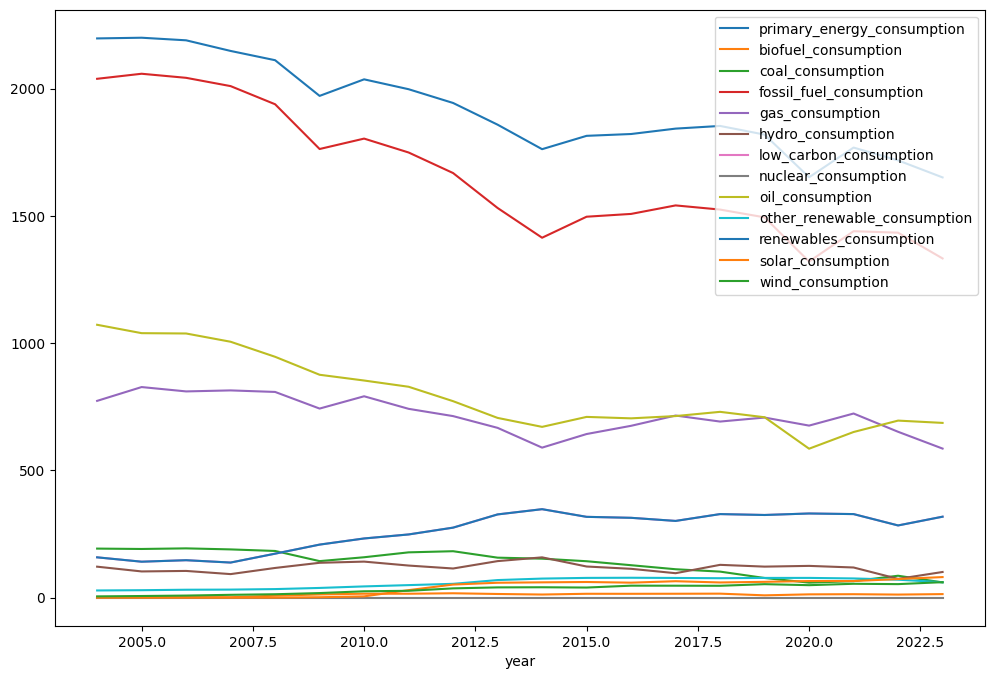

In [769]:
data_owid_consumption.plot(figsize=(12,8))

<Axes: xlabel='year'>

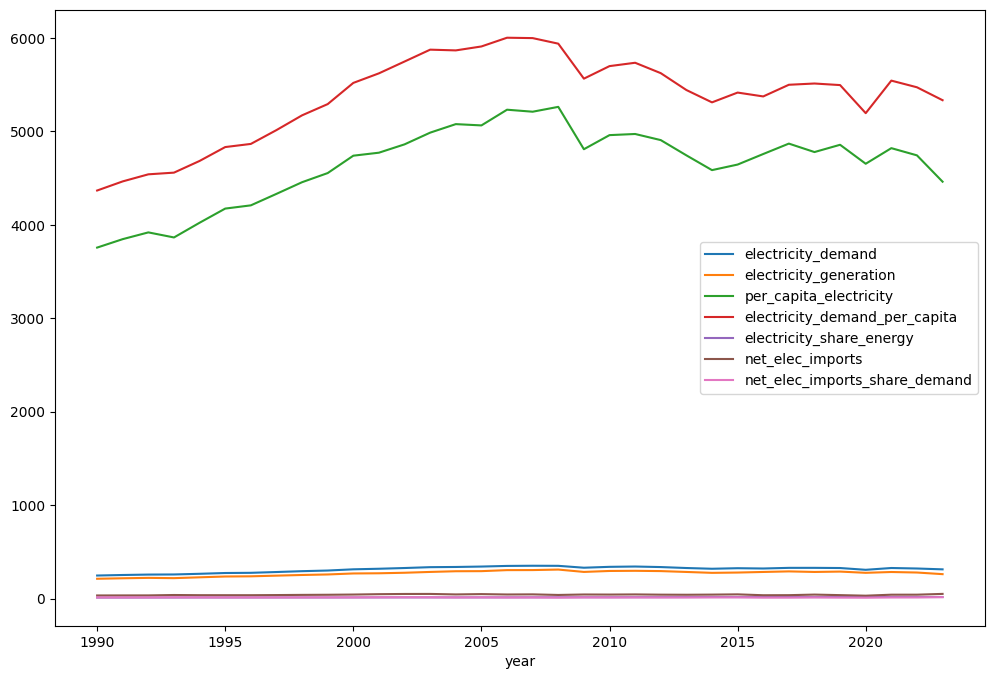

In [770]:
data_owid_electricity[['electricity_demand','electricity_generation','per_capita_electricity','electricity_demand_per_capita',
                           'electricity_share_energy','net_elec_imports','net_elec_imports_share_demand']].plot(figsize=(12,8))

<Axes: xlabel='year'>

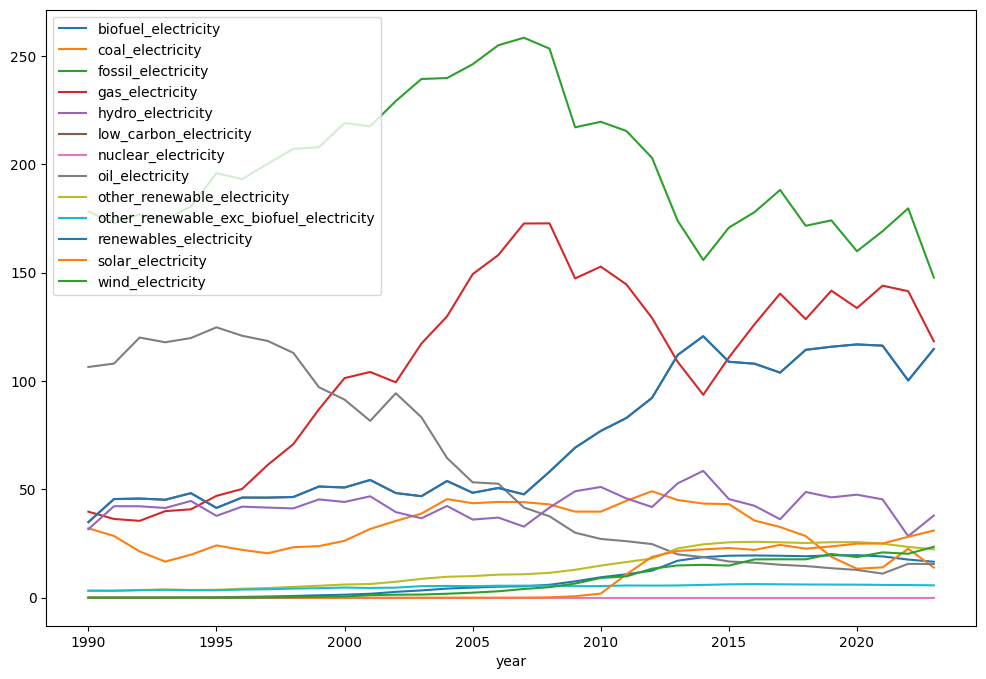

In [771]:
data_owid_electricity.drop(['electricity_demand','electricity_generation','per_capita_electricity','electricity_demand_per_capita',
                           'electricity_share_energy','net_elec_imports','net_elec_imports_share_demand'],axis=1).plot(figsize=(12,8))

<Axes: xlabel='year'>

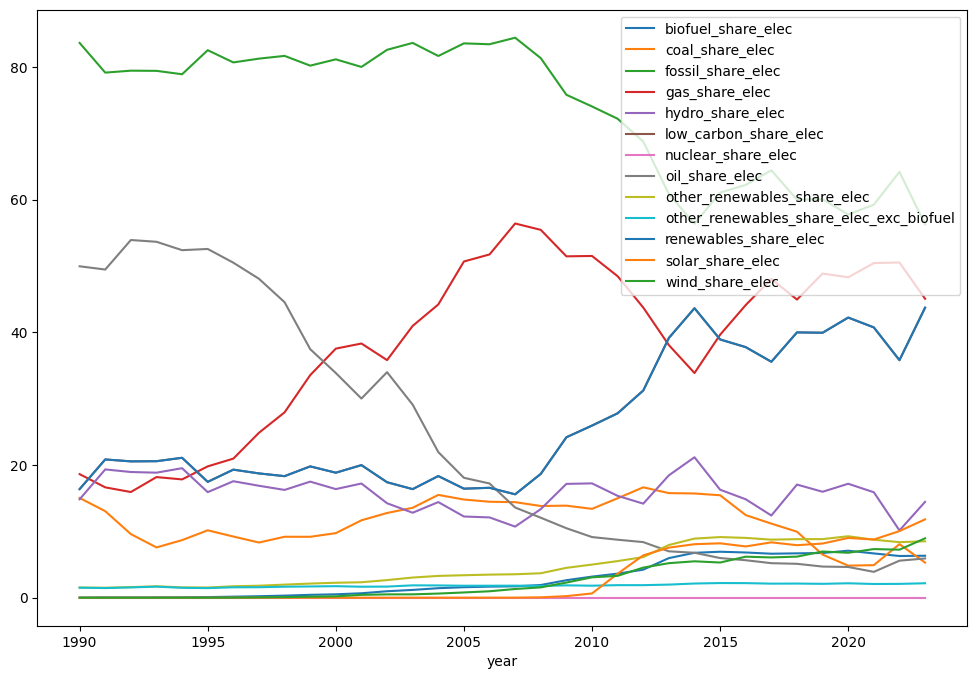

In [772]:
data_owid_share_elec.drop(['electricity_demand','electricity_generation'],axis=1).plot(figsize=(12,8))

<Axes: xlabel='year'>

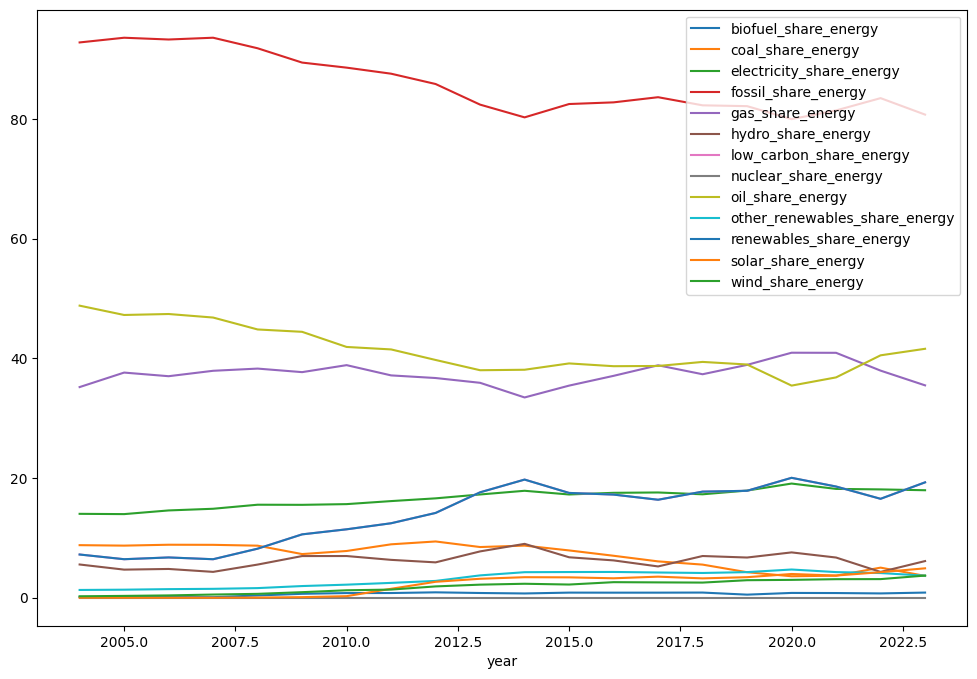

In [773]:
data_owid_share_energy.drop(['primary_energy_consumption'],axis=1).plot(figsize=(12,8))

In [774]:
data_owid = data_owid.loc[(data_owid['year'] > 1930) & (data_owid['year'] < 2015) & (data_owid['country'] == 'Italy')]

In [775]:
data_owid

,country,year,iso_code,population,gdp,biofuel_cons_change_pct,biofuel_cons_change_twh,biofuel_cons_per_capita,biofuel_consumption,biofuel_elec_per_capita,biofuel_electricity,biofuel_share_elec,biofuel_share_energy,carbon_intensity_elec,coal_cons_change_pct,coal_cons_change_twh,coal_cons_per_capita,coal_consumption,coal_elec_per_capita,coal_electricity,coal_prod_change_pct,coal_prod_change_twh,coal_prod_per_capita,coal_production,coal_share_elec,coal_share_energy,electricity_demand,electricity_demand_per_capita,electricity_generation,electricity_share_energy,energy_cons_change_pct,energy_cons_change_twh,energy_per_capita,energy_per_gdp,fossil_cons_change_pct,fossil_cons_change_twh,fossil_elec_per_capita,fossil_electricity,fossil_energy_per_capita,fossil_fuel_consumption,fossil_share_elec,fossil_share_energy,gas_cons_change_pct,gas_cons_change_twh,gas_consumption,gas_elec_per_capita,gas_electricity,gas_energy_per_capita,gas_prod_change_pct,gas_prod_change_twh,gas_prod_per_capita,gas_production,gas_share_elec,gas_share_energy,greenhouse_gas_emissions,hydro_cons_change_pct,hydro_cons_change_twh,hydro_consumption,hydro_elec_per_capita,hydro_electricity,hydro_energy_per_capita,hydro_share_elec,hydro_share_energy,low_carbon_cons_change_pct,low_carbon_cons_change_twh,low_carbon_consumption,low_carbon_elec_per_capita,low_carbon_electricity,low_carbon_energy_per_capita,low_carbon_share_elec,low_carbon_share_energy,net_elec_imports,net_elec_imports_share_demand,nuclear_cons_change_pct,nuclear_cons_change_twh,nuclear_consumption,nuclear_elec_per_capita,nuclear_electricity,nuclear_energy_per_capita,nuclear_share_elec,nuclear_share_energy,oil_cons_change_pct,oil_cons_change_twh,oil_consumption,oil_elec_per_capita,oil_electricity,oil_energy_per_capita,oil_prod_change_pct,oil_prod_change_twh,oil_prod_per_capita,oil_production,oil_share_elec,oil_share_energy,other_renewable_consumption,other_renewable_electricity,other_renewable_exc_biofuel_electricity,other_renewables_cons_change_pct,other_renewables_cons_change_twh,other_renewables_elec_per_capita,other_renewables_elec_per_capita_exc_biofuel,other_renewables_energy_per_capita,other_renewables_share_elec,other_renewables_share_elec_exc_biofuel,other_renewables_share_energy,per_capita_electricity,primary_energy_consumption,renewables_cons_change_pct,renewables_cons_change_twh,renewables_consumption,renewables_elec_per_capita,renewables_electricity,renewables_energy_per_capita,renewables_share_elec,renewables_share_energy,solar_cons_change_pct,solar_cons_change_twh,solar_consumption,solar_elec_per_capita,solar_electricity,solar_energy_per_capita,solar_share_elec,solar_share_energy,wind_cons_change_pct,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_electricity,wind_energy_per_capita,wind_share_elec,wind_share_energy
9980,Italy,1931,ITA,40501139.0,1.866570e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-14.549,-0.479,69.411,2.811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000,0.093,4.594,0.186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9981,Italy,1932,ITA,40843255.0,1.906655e+11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.543,0.184,73.333,2.995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.750,0.128,7.688,0.314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9982,Italy,1933,ITA,41185511.0,1.884730e+11,N

In [776]:
data = pd.read_csv("./energy.csv")

In [777]:
data

,year,total_prod,agri,industry,minifactural,transports,public_lights,services,total_cons
0,1931,"10,470",103,"6,213","6,129",803,209,"1,007","8,335"
1,1932,"10,590",103,"6,223","6,143",845,225,"1,024","8,420"
2,1933,"11,650",114,"6,984","6,879",860,243,"1,092","9,293"
3,1934,"12,600",110,"7,684","7,573",879,258,"1,228","10,159"
4,1935,"13,800",138,"8,583","8,458","1,003",267,"1,177","11,168"
...,...,...,...,...,...,...,...,...,...
79,2010,"302,062","5,610","138,439","119,897","10,666","6,366","79,253","309,885"
80,2011,"302,570","5,907","140,040","120,173","10,720","6,202","80,783","313,792"
81,2012,"299,275","5,923","130,801","112,493","10,759","6,261","84,019","307,220"
82,2013,"289,803","5,677","124,871","107,629","10,774","5,977","83,005","297,288"


In [778]:
data_owid = data_owid.reset_index(drop=True)

In [779]:
data = data.reset_index(drop=True)

In [780]:
data['population'] = data_owid['population']

In [781]:
data['gdp'] = data_owid['gdp']

In [782]:
data.tail()

,year,total_prod,agri,industry,minifactural,transports,public_lights,services,total_cons,population,gdp
79,2010,"302,062","5,610","138,439","119,897","10,666","6,366","79,253","309,885",59822452.0,2.080546e+12
80,2011,"302,570","5,907","140,040","120,173","10,720","6,202","80,783","313,792",60025952.0,2.110883e+12
81,2012,"299,275","5,923","130,801","112,493","10,759","6,261","84,019","307,220",60190152.0,2.047960e+12
82,2013,"289,803","5,677","124,871","107,629","10,774","5,977","83,005","297,288",60312600.0,2.010255e+12
83,2014,"279,829","5,372","122,505","105,684","10,462","5,885","82,604","291,084",60322792.0,2.010164e+12


In [783]:
data['gdp_pp'] = data['gdp'] / data['population']

In [784]:
data['population'] = data['population'] / 1000

In [785]:
data['gdp'] = data['gdp'] / 10000000

In [786]:
for col in data.columns:
    if data[col].dtype == 'O':  
        data[col] = data[col].str.replace(',', '', regex=False)
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [787]:
data

,year,total_prod,agri,industry,minifactural,transports,public_lights,services,total_cons,population,gdp,gdp_pp
0,1931,10470,103,6213,6129,803,209,1007,8335,40501.139,18665.701376,4608.685542
1,1932,10590,103,6223,6143,845,225,1024,8420,40843.255,19066.545766,4668.223864
2,1933,11650,114,6984,6879,860,243,1092,9293,41185.511,18847.304909,4576.197903
3,1934,12600,110,7684,7573,879,258,1228,10159,41530.635,18798.734541,4526.474142
4,1935,13800,138,8583,8458,1003,267,1177,11168,41878.651,19814.342656,4731.370802
...,...,...,...,...,...,...,...,...,...,...,...,...
79,2010,302062,5610,138439,119897,10666,6366,79253,309885,59822.452,208054.596403,34778.680821
80,2011,302570,5907,140040,120173,10720,6202,80783,313792,60025.952,211088.336486,35166.178870
81,2012,299275,5923,130801,112493,10759,6261,84019,307220,60190.152,204795.989197,34024.833364
82,2013,289803,5677,124871,107629,10774,5977,83005,297288,60312.600,201025.532723,33330.603012


In [788]:
data.set_index('year',inplace=True)

In [789]:
data

,total_prod,agri,industry,minifactural,transports,public_lights,services,total_cons,population,gdp,gdp_pp
year,,,,,,,,,,,
1931,10470,103,6213,6129,803,209,1007,8335,40501.139,18665.701376,4608.685542
1932,10590,103,6223,6143,845,225,1024,8420,40843.255,19066.545766,4668.223864
1933,11650,114,6984,6879,860,243,1092,9293,41185.511,18847.304909,4576.197903
1934,12600,110,7684,7573,879,258,1228,10159,41530.635,18798.734541,4526.474142
1935,13800,138,8583,8458,1003,267,1177,11168,41878.651,19814.342656,4731.370802
...,...,...,...,...,...,...,...,...,...,...,...
2010,302062,5610,138439,119897,10666,6366,79253,309885,59822.452,208054.596403,34778.680821
2011,302570,5907,140040,120173,10720,6202,80783,313792,60025.952,211088.336486,35166.178870
2012,299275,5923,130801,112493,10759,6261,84019,307220,60190.152,204795.989197,34024.833364


In [790]:
data.to_csv('energy_dataset.csv',index=False)

<Axes: xlabel='year'>

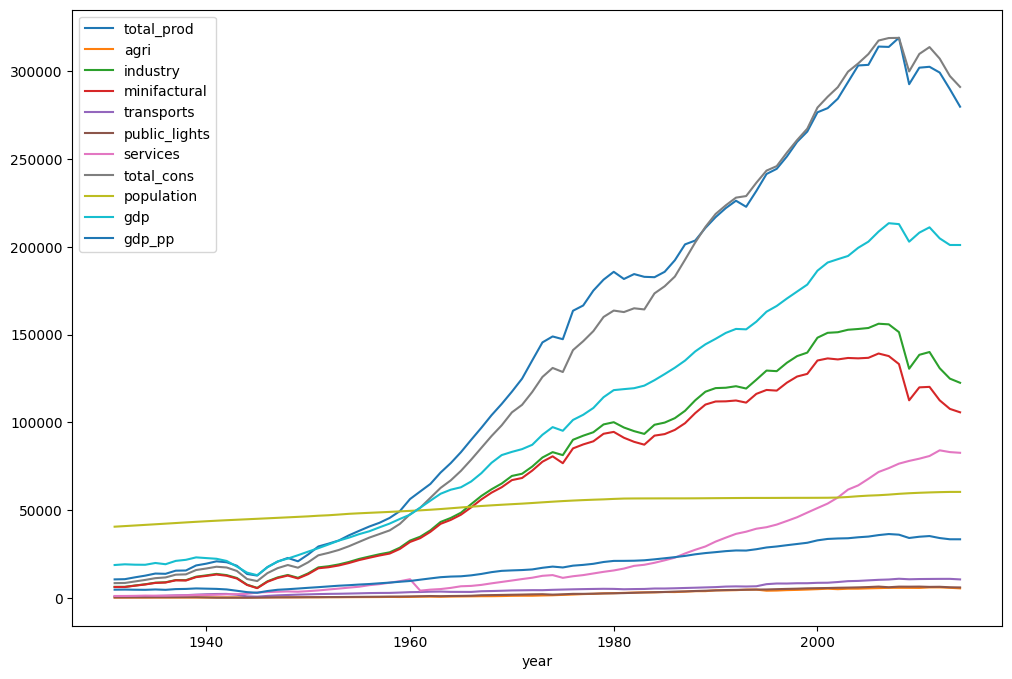

In [791]:
data.plot(figsize=(12,8))

<Axes: xlabel='year'>

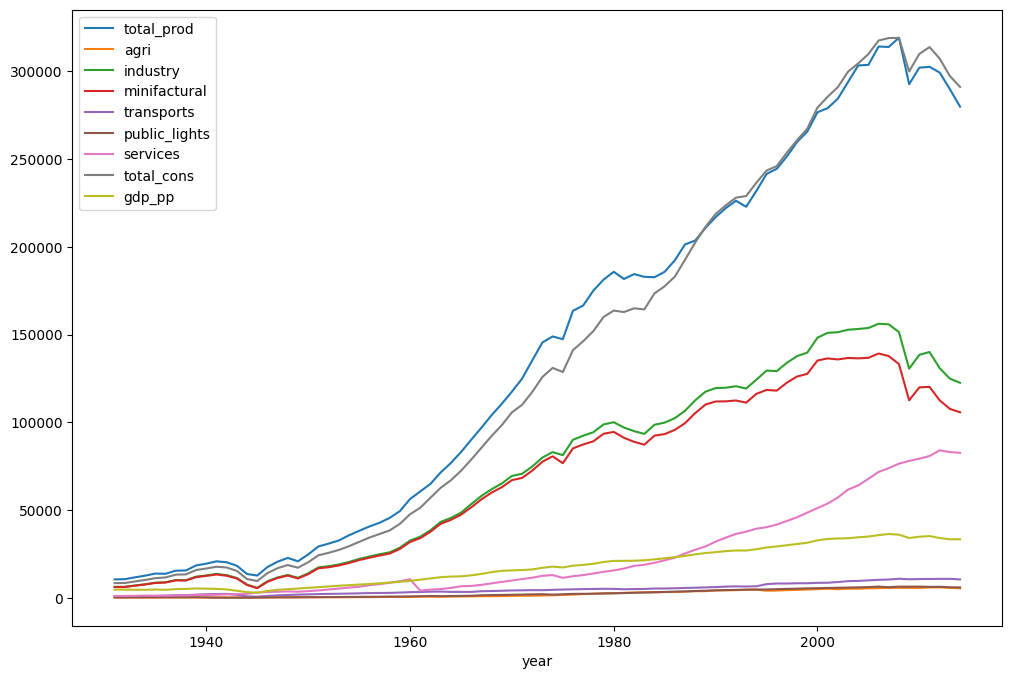

In [792]:
data.drop(['gdp','population'],axis=1).plot(figsize=(12,8))

<Axes: xlabel='year'>

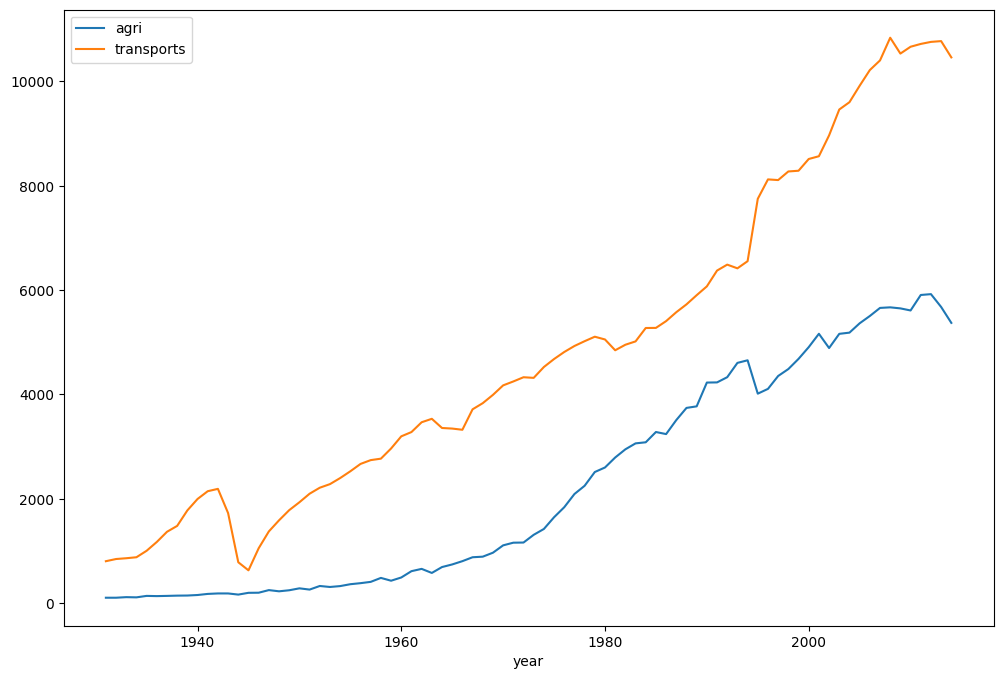

In [793]:
data[['agri','transports']].plot(figsize=(12,8))

# var model

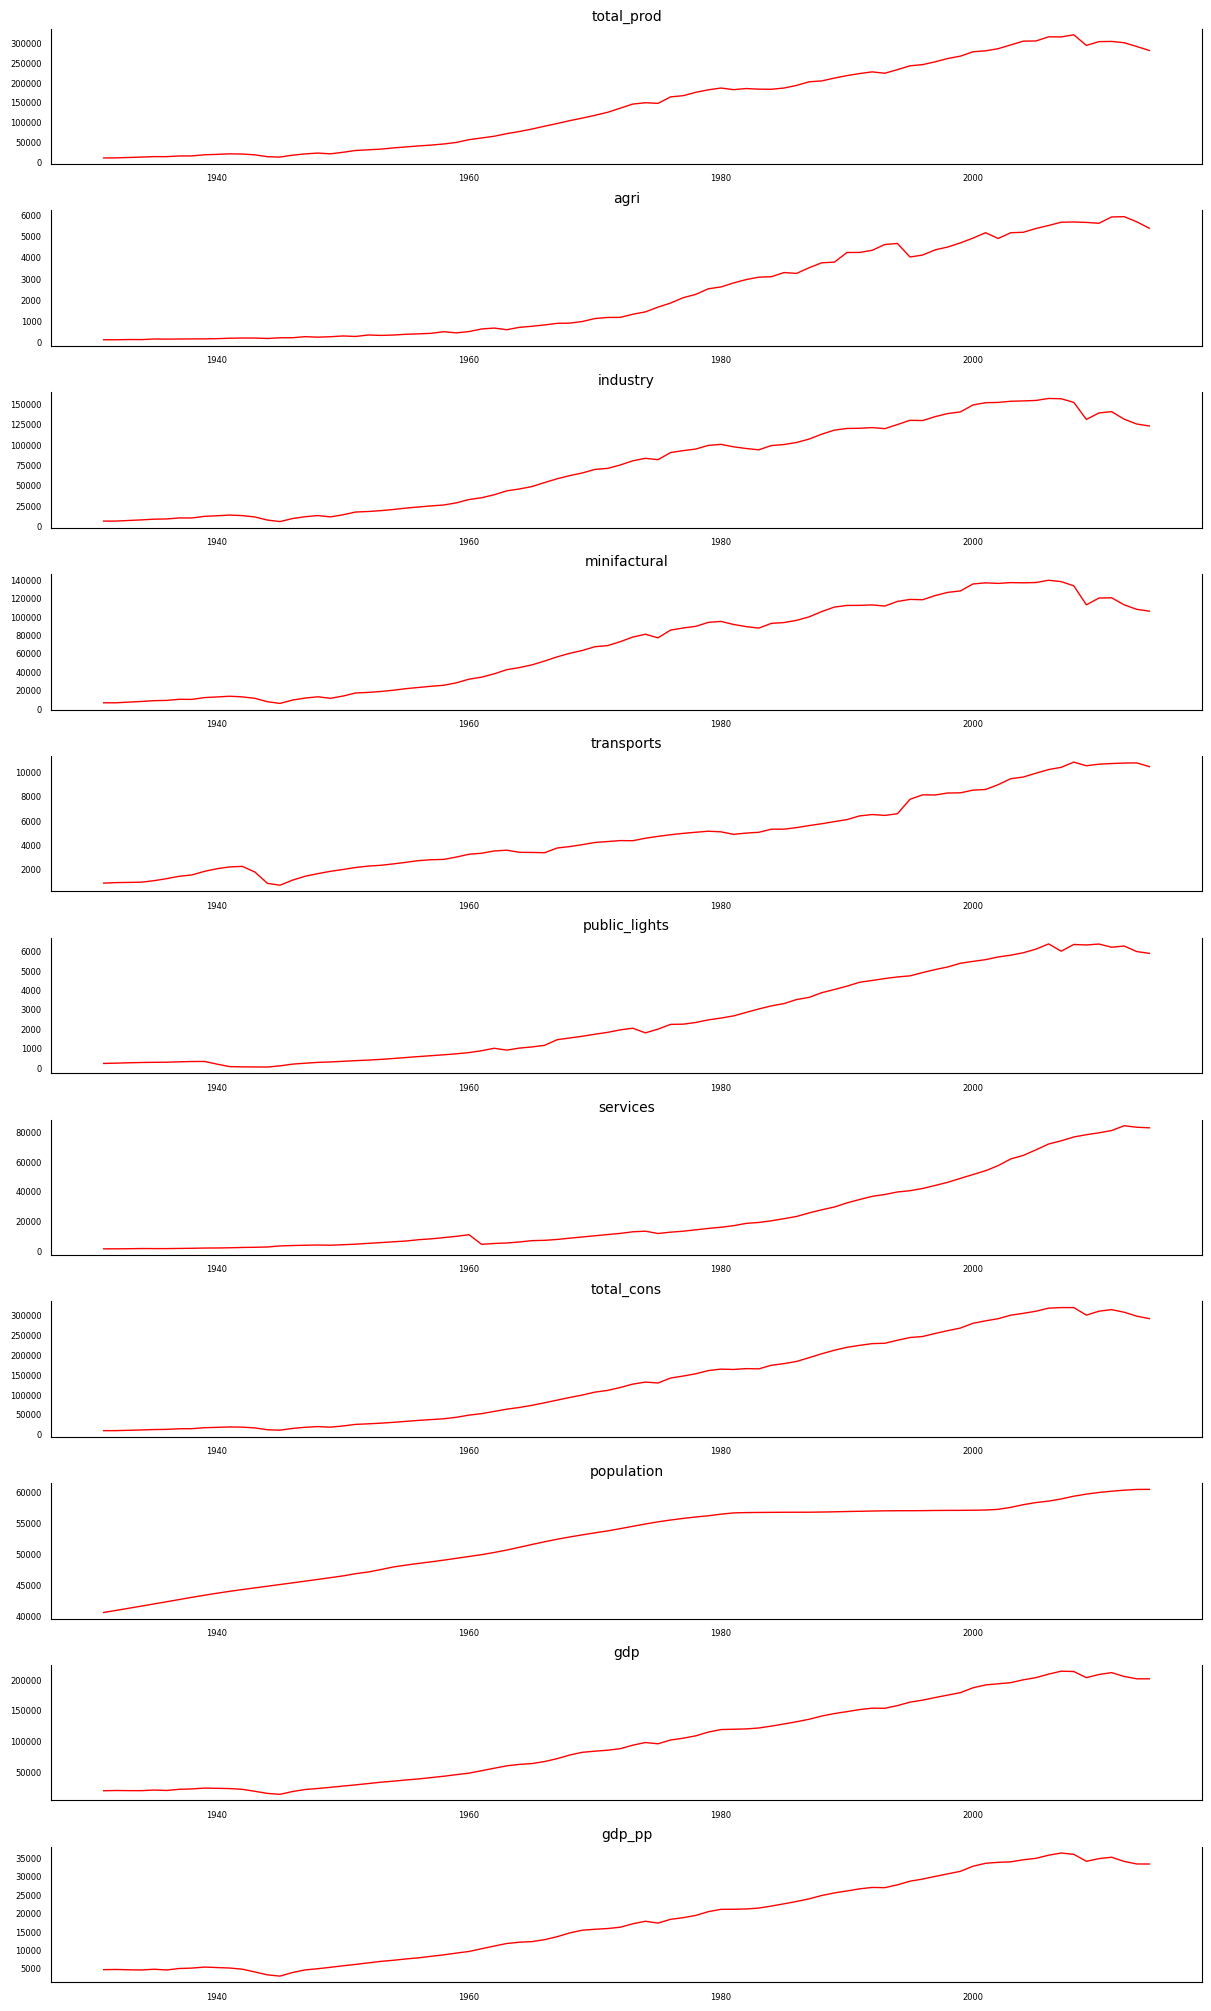

In [794]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

## normalize

In [795]:
avgs = data.mean()

In [796]:
devs = data.std()

In [797]:
for col in data.columns:
    data[col] = (data[col] - avgs.loc[col]) / devs.loc[col]

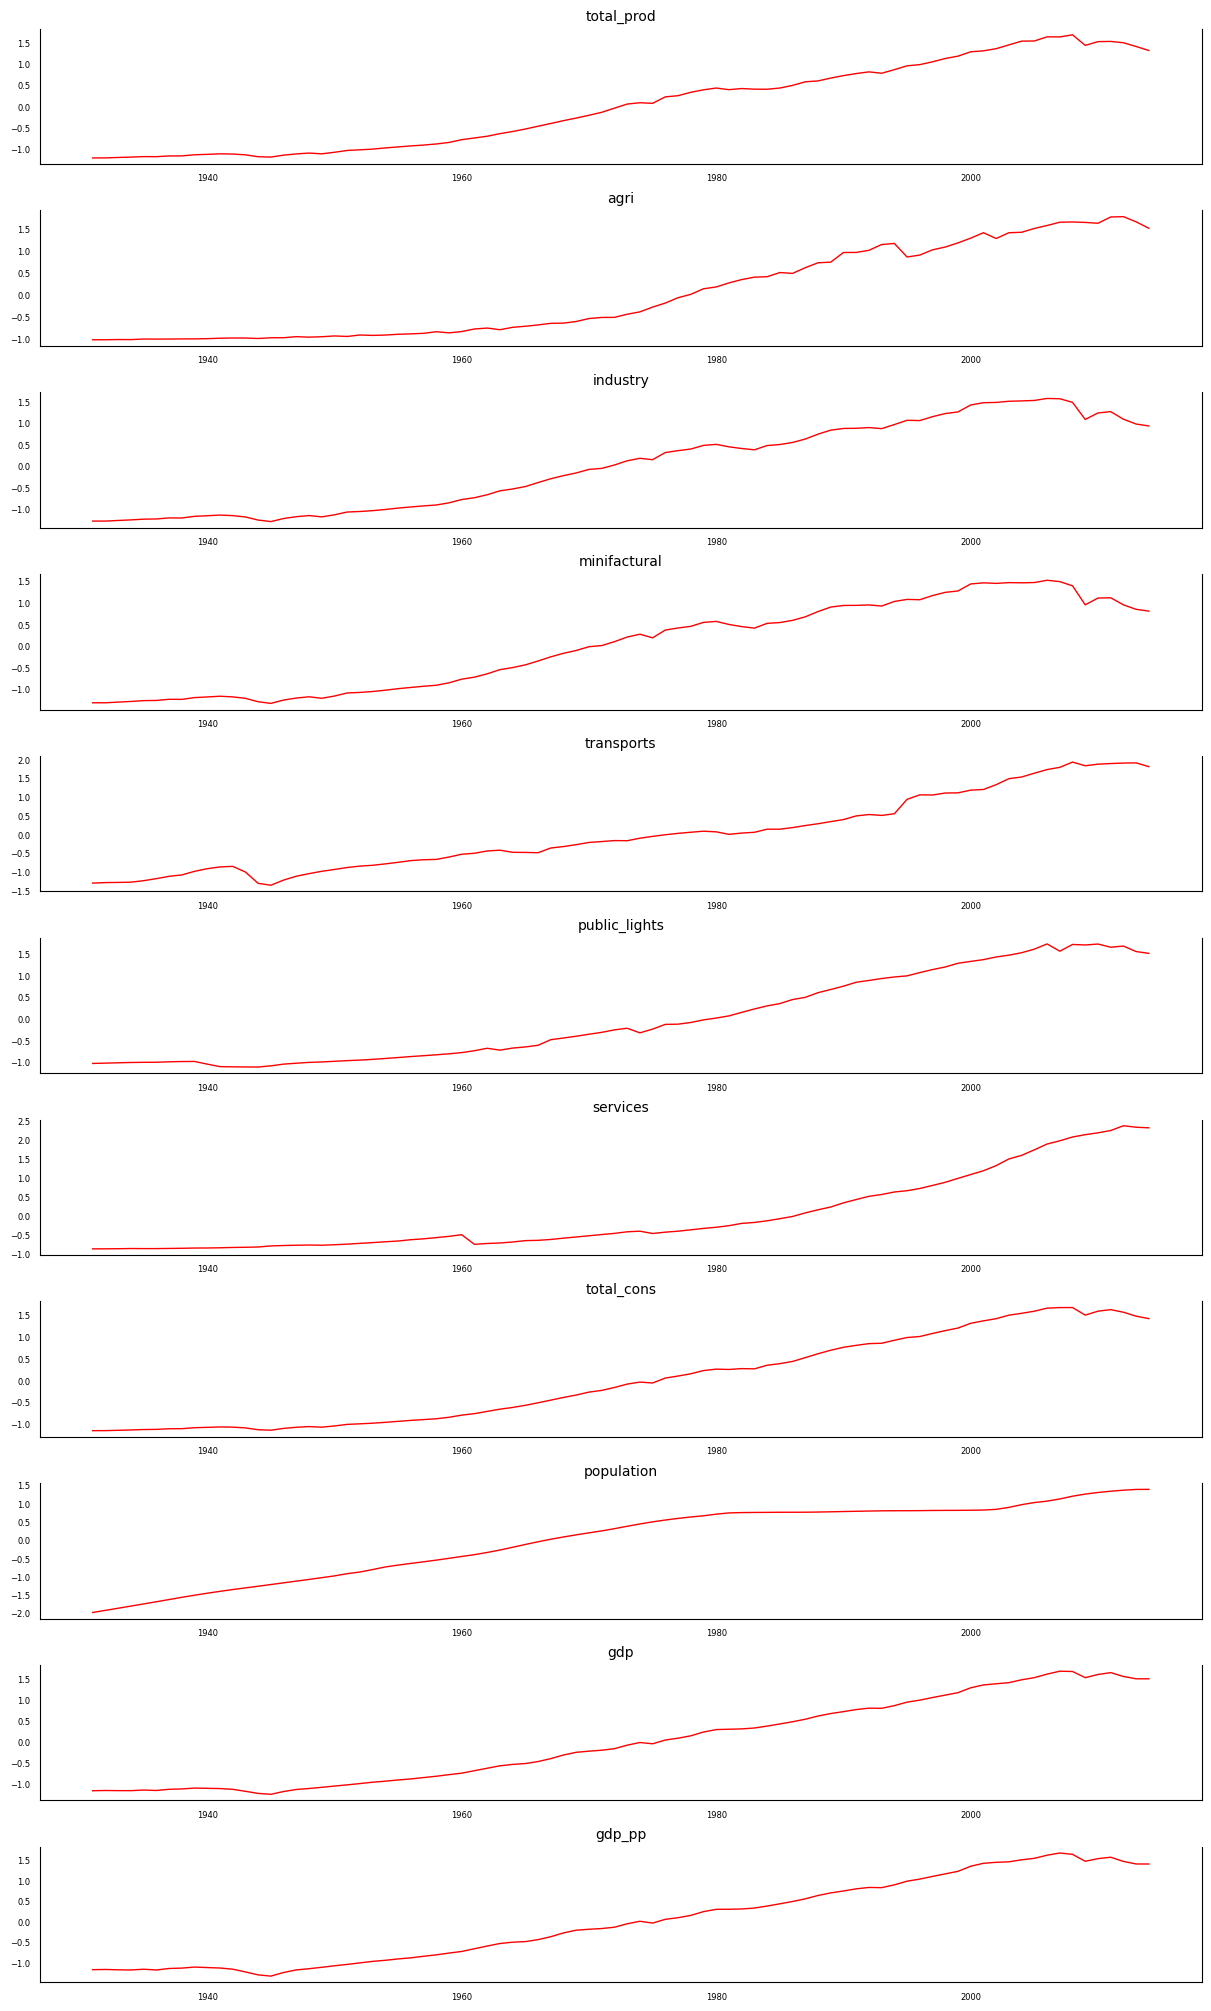

In [798]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

## remove trend

In [799]:
data = data.diff()

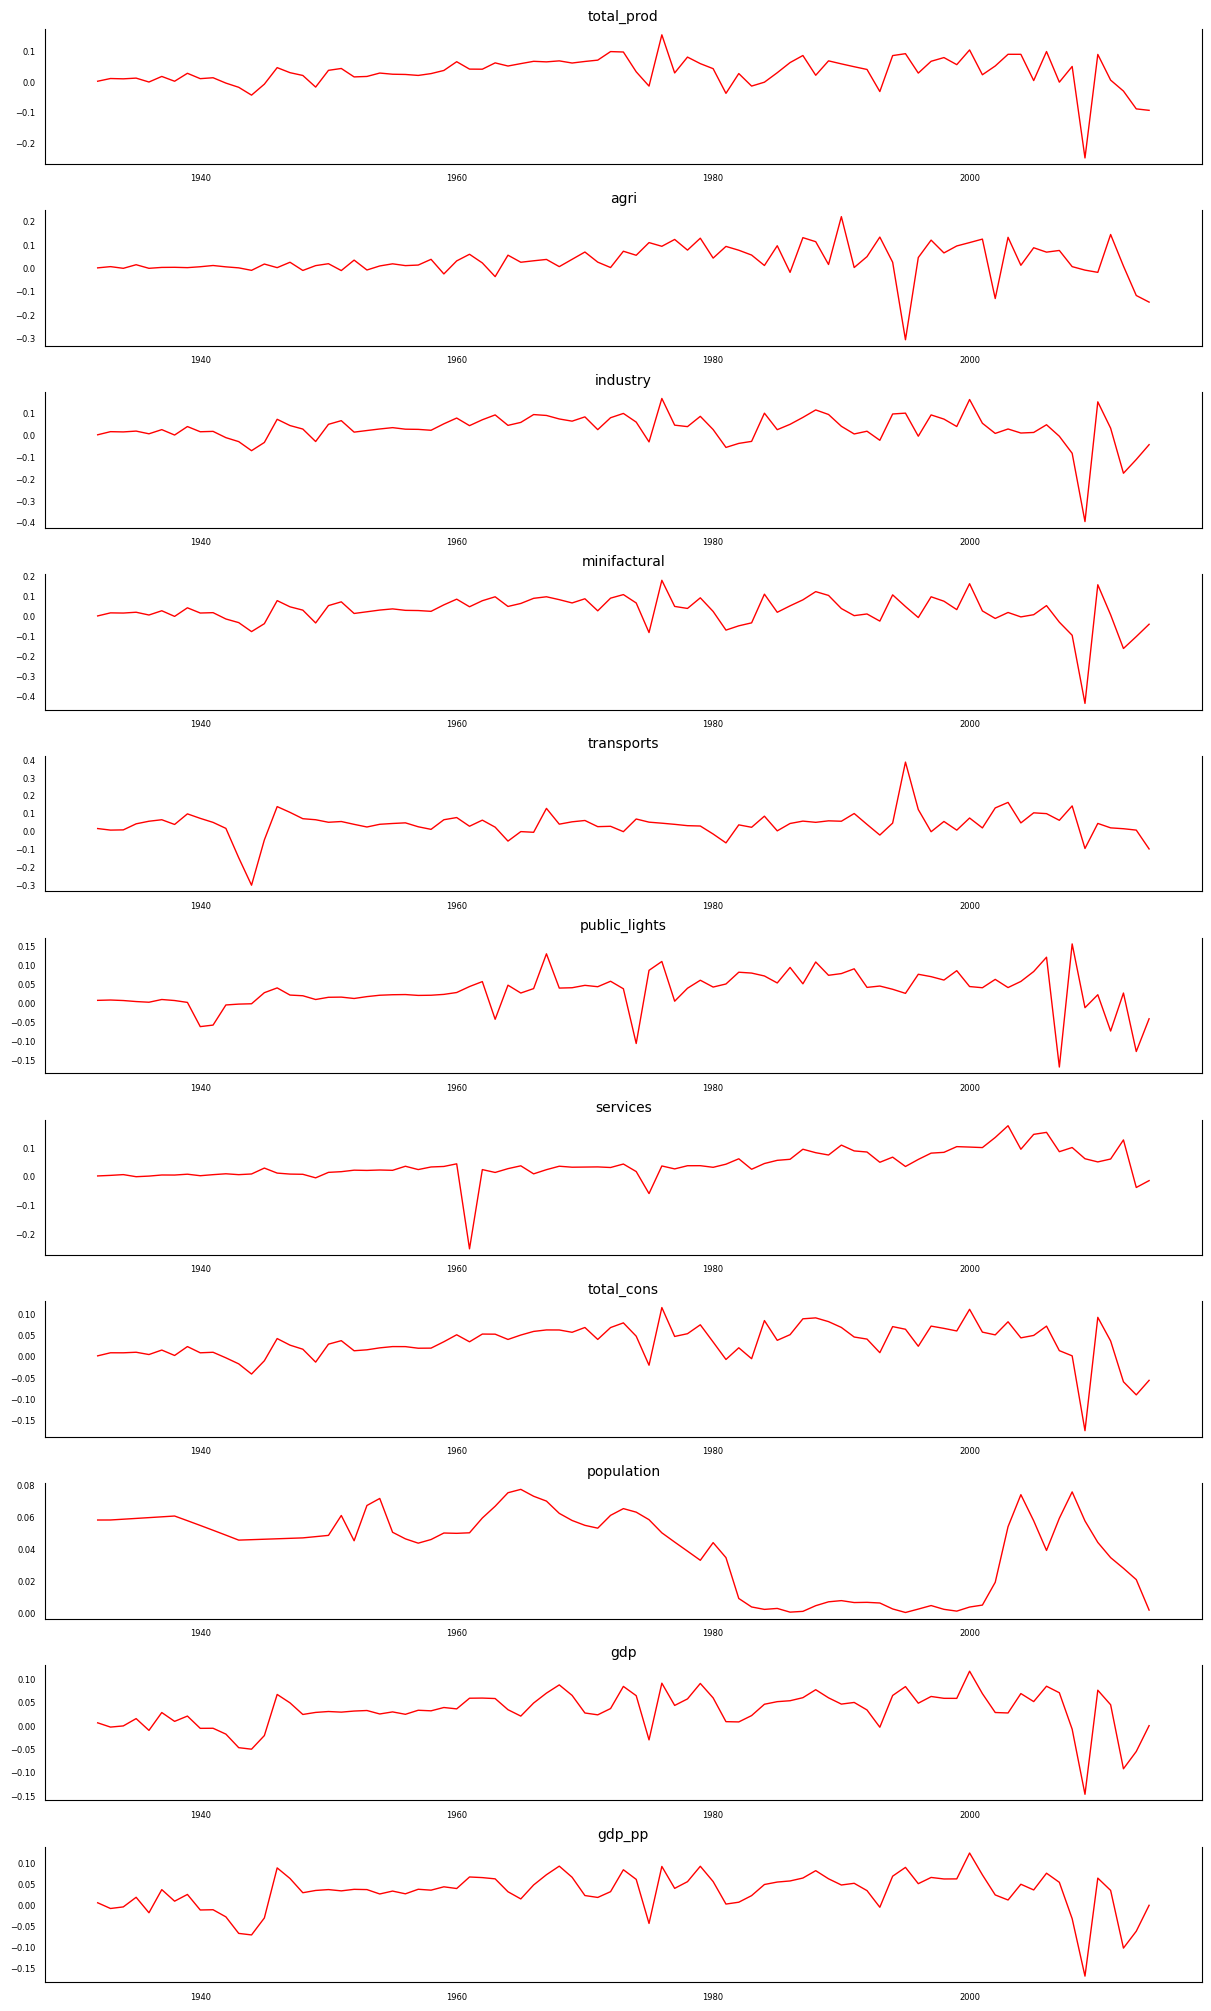

In [800]:
fig, axes = plt.subplots(nrows=11,figsize=(12, 20),constrained_layout=True)

for i, ax in enumerate(axes):
    data_ = data[data.columns[i]]
    
    ax.plot(data_, color='red', linewidth=1)
    ax.set_title(data.columns[i], fontsize=10)
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.show()

## remove seasonality

In [805]:
annual_avgs = data.groupby(data.index).mean()

In [806]:
annual_avgs

,total_prod,agri,industry,minifactural,transports,public_lights,services,total_cons,population,gdp,gdp_pp
year,,,,,,,,,,,
1931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,0.001128,0.000000,0.000190,0.000298,0.013555,0.007196,0.000662,0.000775,0.058065,0.005888,0.005331
1933,0.009967,0.005296,0.014485,0.015682,0.004841,0.008096,0.002649,0.007960,0.058089,-0.003220,-0.008241
1934,0.008932,-0.001926,0.013324,0.014787,0.006132,0.006747,0.005297,0.007897,0.058576,-0.000713,-0.004453
1935,0.011283,0.013481,0.017112,0.018857,0.040020,0.004048,-0.001986,0.009200,0.059067,0.014918,0.018348
...,...,...,...,...,...,...,...,...,...,...,...
2010,0.088571,-0.019259,0.151003,0.157269,0.042279,0.022039,0.049505,0.090911,0.044062,0.075679,0.063886
2011,0.004776,0.142998,0.030475,0.005881,0.017428,-0.073763,0.059593,0.035626,0.034539,0.044561,0.034699
2012,-0.030981,0.007704,-0.175862,-0.163640,0.012587,0.026537,0.126041,-0.059926,0.027869,-0.092425,-0.102204
